In [1]:
import numpy as np

def compute_vector_length(vector):
    return np.linalg.norm(vector)

def compute_dot_product(vector1, vector2):
    return np.dot(vector1, vector2)

def matrix_multi_vector(matrix, vector):
    return np.dot(matrix, vector)

def matrix_multi_matrix(matrix1, matrix2):
    return np.dot(matrix1, matrix2)

def inverse_matrix(matrix):
    return np.linalg.inv(matrix)

def compute_eigenvalues_eigenvectors(matrix):
    return np.linalg.eig(matrix)

def compute_cosine(v1, v2):
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

In [3]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

bg1_img = cv2.imread('GreenBackground.png', 1)
bg1_img = cv2.resize(bg1_img, (678, 381))

ob_img = cv2.imread('Object.png', 1)
ob_img = cv2.resize(ob_img, (678, 381))

bg2_img = cv2.imread('NewBackground.jpg', 1)
bg2_img = cv2.resize(bg2_img, (678, 381))

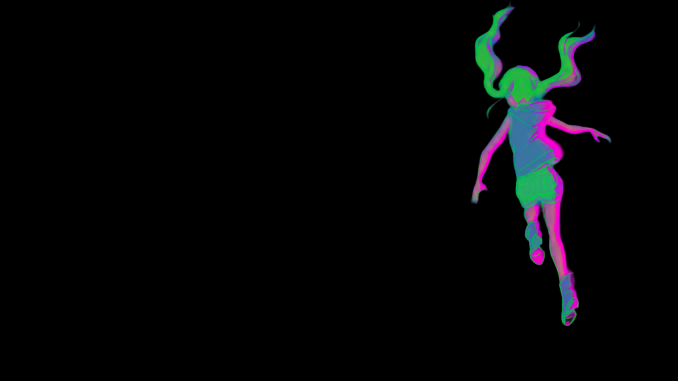

In [4]:
def compute_difference(bg_img, input_img):
    difference_single_channel = cv2.absdiff(bg_img, input_img)
    return difference_single_channel

difference_single_channel = compute_difference(bg1_img, ob_img)
cv2_imshow(difference_single_channel)

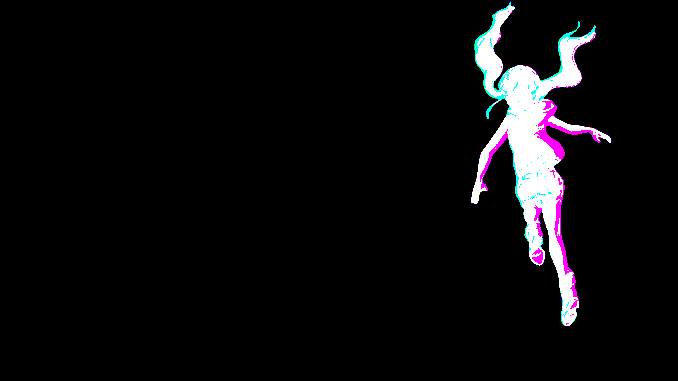

In [5]:
def compute_binary_mask(difference_single_channel):
    _, difference_binary = cv2.threshold(difference_single_channel, 15, 255, cv2.THRESH_BINARY)
    return difference_binary

binary_mask = compute_binary_mask(difference_single_channel)
cv2_imshow(binary_mask)

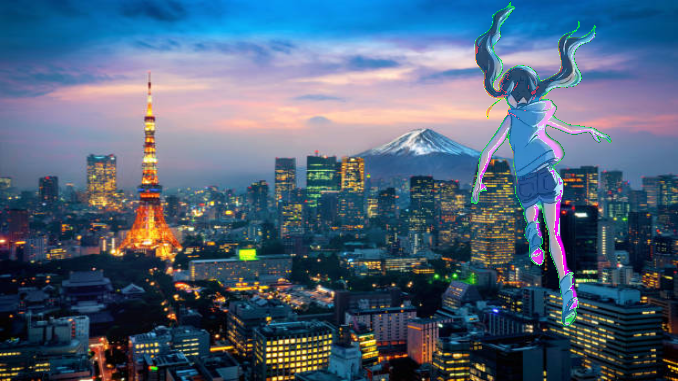

In [6]:
def replace_background(bg1_img, bg2_img, ob_img):
    difference_single_channel = compute_difference(bg1_img, ob_img)
    binary_mask = compute_binary_mask(difference_single_channel)
    output = np.where(binary_mask==255, ob_img, bg2_img)
    return output

output = replace_background(bg1_img, bg2_img, ob_img)
cv2_imshow(output)

In [7]:
vector = np.array([-2, 4, 9, 21])
result = compute_vector_length([vector])
print(round(result, 2))

23.28


In [9]:
v1 = np.array([0, 1, -1, 2])
v2 = np.array([2, 5, 1, 0])
result = compute_dot_product(v1, v2)
print(round(result, 2))

4


In [10]:
x = np.array([[1, 2], [3, 4]])
k = np.array([1, 2])
print('result \n', x.dot(k))

result 
 [ 5 11]


In [11]:
x = np.array([[-1, 2], [3, -4]])
k = np.array([1, 2])
print(x @ k)

[ 3 -5]


In [12]:
m = np.array([[-1, 1, 1], [0, -4, 9]])
v = np.array([0, 2, 1])
result = matrix_multi_vector(m, v)
print(result)

[3 1]


In [13]:
n1 = np.array([[0, 1, 2], [2, -3, 1]])
m2 = np.array([[1, -3],[6, 1], [0, -1]])
result = matrix_multi_matrix(n1, m2)
print(result)

[[  6  -1]
 [-16 -10]]


In [14]:
m1 = np.eye(3)
m2 = np.array([[1, 1, 1], [2, 2, 2], [3, 3, 3]])
result = m1 @ m2
print(result)

[[1. 1. 1.]
 [2. 2. 2.]
 [3. 3. 3.]]


In [15]:
m1 = np.eye(2)
m1 = np.reshape(m1, (-1, 4))[0]
m2 = np.array([[1, 1, 1, 1], [2, 2, 2, 2], [3, 3, 3, 3], [4, 4, 4, 4]])
result = m1 @ m2
print(result)

[5. 5. 5. 5.]


In [16]:
m1 = np.array([[1, 2], [3, 4]])
m1 = np.reshape(m1, (-1, 4), "F") [0]
m2 = np.array([[1, 1, 1, 1], [2, 2, 2, 2], [3, 3, 3, 3], [4, 4, 4, 4]])
result = m1 @ m2
print(result)

[29 29 29 29]


In [17]:
m1 = np.array([[-2, 6], [8, -4]])
result = inverse_matrix(m1)
print(result)

[[0.1  0.15]
 [0.2  0.05]]


In [18]:
matrix = np.array([[0.9, 0.2], [0.1, 0.8]])
eigenvalues, eigenvectors = compute_eigenvalues_eigenvectors(matrix)
print(eigenvectors)

[[ 0.89442719 -0.70710678]
 [ 0.4472136   0.70710678]]


In [19]:
x = np.array([1, 2, 3, 4])
y = np.array([1, 0, 3, 0])
result = compute_cosine(x, y)
print(round(result, 3))

0.577
